# Open Midterm 1

## FINM 36700 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Points
* For every minute late you submit the exam, you will lose one point.

Rules
* The exam is open-material, closed-communication.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.

## Data

**All data files are found in at the course web-book.**

https://markhendricks.github.io/finm-portfolio/. 

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 70     |
| 2       | 30     |

**Numbered problems are worth 5pts unless specified otherwise.**

***

## Submitting your Exam

Your submitted file (ipynb or .zip) must be named in the format...
* `midterm-1-LASTNAME-FIRSTNAME.ipynb`
* `midterm-1-LASTNAME-FIRSTNAME.zip`

Submit the exam via
* Canvas at Assignments/Midterm 1
* If there is any trouble with Canvas, or for a backup, submit it at the course web-book
https://markhendricks.github.io/finm-portfolio/. 

Your submission must be complete.
* If we can't run the notebook to reproduce, it is not complete.

You should either...
* include all helper functions at the top of this notebook in the `Solution Functions` sections.
* submit a zipped folder containing the solution functions

__Exam Submission Structure:__

If you are submitting a zipped folder (because you cannot make the ipynb stand-alone) then use this structure...

```plaintext
exam-open-LASTNAME-FIRSTNAME.zip/
│── exam-open.ipynb
│── data/
│   ├── example_data.csv
│── modules/
│   ├── my_functions.py

***

## Your Functions

Please put all functions needed to run the ipynb here.

* We must be able to run the notebook!
* If you can't get all the functions into this ipynb, then make sure to zip your ipynb and supporting materials and submit the zipped folder.
* But most of you should be able to submit a single, stand-alone ipynb.

***

## Citations

### AI

List any AI tools used in the exam. No need to list prompts, but rather just AI models or IDE integrations.

I expect most students will have something to list here.



I used OpenAI’s ChatGPT (GPT-5) through the ChatGPT interface to assist with:
- Debugging Python and pandas code.
- Structuring clean and reproducible Jupyter Notebook workflows.
- Clarifying statistical and financial concepts (e.g., tangency portfolio, VaR/CVaR).
- Reviewing and polishing written explanations for clarity and conciseness.

All code and interpretations were reviewed, verified, and run independently by me before submission.




### Other resources

Please list any other resources **aside from course materials** from which you used substantially. (No need to list every Google search; just materials from which you used substantially or for specific, original content.) 

I expect most students will not have anything to list here.

* 
* 
* 

***

# Your Name

List your name and CNetID

* Name: Jacopo Michelacci
* CNetID: 12507213

***

# 1. Portfolio Analysis

### Data

Use the data in `data/midterm_1_stock_returns.xlsx`.

The returns are...
* excess returns
* weekly
* through `May 2025`

It has returns for
* `25` single-name equities
* `SPY`

In [1]:
import pandas as pd

DATAFILE_STOCKS = '../data/midterm_1_stock_returns.xlsx'

SHEET = 'stock rets'
rets = pd.read_excel(DATAFILE_STOCKS, sheet_name=SHEET, index_col='date', parse_dates=['date'])

SHEET = 'benchmark rets'
spy = pd.read_excel(DATAFILE_STOCKS, sheet_name=SHEET, index_col='date', parse_dates=['date'])

display(rets.head())
display(spy.tail())

,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
date,,,,,,,,,,,,,,,,,,,,,
2015-01-09,-0.021166,-0.008927,-0.078893,-0.000577,0.026536,0.069378,-0.024107,-0.030450,-0.003635,-0.002414,...,0.093897,-0.008843,-0.002101,-0.023393,-0.001091,0.013659,-0.008009,-0.009050,-0.004251,0.040160
2015-01-16,-0.024369,-0.015313,-0.041579,-0.045022,0.012374,0.001515,0.019290,0.019265,0.019738,0.036405,...,0.007512,-0.024325,0.011081,-0.009830,-0.012042,-0.020590,0.048080,0.002865,0.013778,-0.028873
2015-01-23,0.023571,0.016282,0.029527,-0.004231,0.050829,0.013841,0.009121,0.012027,0.016490,0.014229,...,-0.008567,0.037842,-0.005804,-0.003565,0.080951,0.023033,0.022253,-0.031965,0.014548,0.020053
2015-01-30,-0.071920,0.069487,-0.027466,-0.018513,-0.003684,0.012031,-0.039124,-0.035766,0.002540,-0.017317,...,-0.035366,0.002970,-0.064277,-0.033041,-0.014190,-0.014506,-0.004689,-0.019552,-0.029622,-0.039883
2015-02-06,0.056754,0.037577,0.012818,0.048856,0.001733,-0.028619,-0.009970,0.044489,-0.020120,-0.049186,...,-0.024717,0.016318,0.015660,0.040609,0.010108,0.026985,-0.031460,0.013922,0.019639,0.027653


,SPY
date,
2025-04-25,0.046029
2025-05-02,0.029275
2025-05-09,-0.004270
2025-05-16,0.052911
2025-05-23,-0.025395


## 1 Performance Stats

#### 1.1. Calculate the Sharpe ratio for each stock during the sample period
* Recall: the sample period ranges from **February 2018 to December 2024 (inclusive)**.
* Report the top 5 stocks with the highest Sharpe ratios.

In [2]:
# Filter sample period
rets_intact = rets
rets = rets.loc["2015-01-01":"2024-12-31"]

# Compute annualized mean and volatility
mean_annual = rets.mean() * 52
vol_annual = rets.std() * (52 ** 0.5)

sharpe_subs = mean_annual / vol_annual

# Top 5 stocks
top5 = sharpe_subs.sort_values(ascending=False).head(5)

print("Top 5 Stocks by Sharpe Ratio (2018–2024):\n")
print(top5.round(4))


Top 5 Stocks by Sharpe Ratio (2018–2024):

WM       0.9298
GOOGL    0.8548
INTU     0.8437
TTWO     0.7855
WMT      0.7734
dtype: float64


#### 1.2. Display the correlation matrix for the first ten stocks (columns) over the sample period.
* On average, are these stocks highly correlated? Explain.
* Which of these stocks offer the best diversification benefits?

In [3]:
import numpy as np

# First 10 stocks
corr_matrix = rets.iloc[:, :10].corr()

print("Correlation Matrix (first 10 stocks):\n")
display(corr_matrix.round(4))

# Average correlation
avg_corr = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)).mean().mean()
print(f"\nAverage correlation among first 10 stocks: {avg_corr:.3f}")

Correlation Matrix (first 10 stocks):



,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE
ADSK,1.0000,0.4015,0.5023,0.4489,0.3203,0.1988,0.2690,0.3254,0.2902,0.1882
AOS,0.4015,1.0000,0.4582,0.5816,0.3965,0.3009,0.3799,0.5267,0.3913,0.3229
BKNG,0.5023,0.4582,1.0000,0.5528,0.2146,0.3053,0.2336,0.4430,0.2454,0.2926
CBRE,0.4489,0.5816,0.5528,1.0000,0.3977,0.4109,0.2359,0.4627,0.4050,0.4804
CCI,0.3203,0.3965,0.2146,0.3977,1.0000,0.1274,0.2161,0.2363,0.3993,0.5351
CF,0.1988,0.3009,0.3053,0.4109,0.1274,1.0000,0.2432,0.4646,0.2518,0.2722
CHRW,0.2690,0.3799,0.2336,0.2359,0.2161,0.2432,1.0000,0.3259,0.1953,0.2198
DE,0.3254,0.5267,0.4430,0.4627,0.2363,0.4646,0.3259,1.0000,0.3050,0.3528
DGX,0.2902,0.3913,0.2454,0.4050,0.3993,0.2518,0.1953,0.3050,1.0000,0.4816
DTE,0.1882,0.3229,0.2926,0.4804,0.5351,0.2722,0.2198,0.3528,0.4816,1.0000



Average correlation among first 10 stocks: 0.347


## 2. In-Sample Tangency (excess returns)

#### Note
Consider `in-sample` to be all the data through the end of `2024`.

#### 2.1. Construct the tangency portfolio

Using just the in-sample data (through `2024`), calculate the tangency portfolio weights, assuming we have excess returns (existence of a risk-free rate.)
   * Display the ten largest portfolio weights.
   * Plot the Sharpe ratios against the portfolio weights. 

Top 10 Tangency Portfolio Weights:

DTE      0.4524
WM       0.3649
GOOGL    0.2057
TTWO     0.1989
DE       0.1915
WMT      0.1851
MRK      0.1685
CBRE     0.1670
PG       0.0880
INTU     0.0845
Name: Tangency Weights, dtype: float64


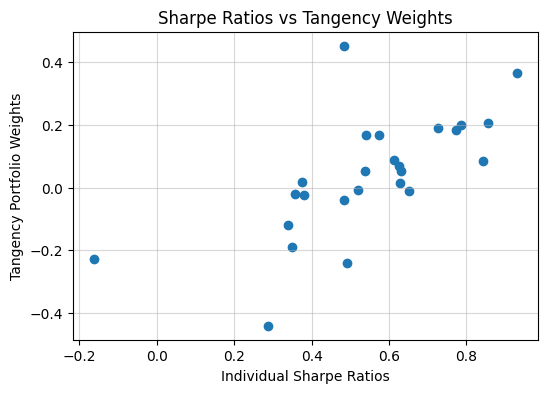

In [4]:
import matplotlib.pyplot as plt

# In-sample data through 2024
rets_in = rets.loc[:'2024-12-31']

# Mean vector and covariance matrix
mu = rets_in.mean().values * 52          # annualized mean
Sigma = rets_in.cov().values * 52        # annualized covariance

# Tangency portfolio weights (since data = excess returns)
w_tan = np.linalg.inv(Sigma) @ mu
w_tan = w_tan / w_tan.sum()              # normalize to sum to 1

# Create DataFrame
w_tan_df = pd.Series(w_tan, index=rets.columns, name="Tangency Weights")
top10 = w_tan_df.sort_values(ascending=False).head(10)

print("Top 10 Tangency Portfolio Weights:\n")
print(top10.round(4))

# Compute individual Sharpe ratios
sharpe_indiv = mu / np.sqrt(np.diag(Sigma))
sharpe_df = pd.Series(sharpe_indiv, index=rets.columns)

# Plot Sharpe ratios vs weights
plt.figure(figsize=(6,4))
plt.scatter(sharpe_df, w_tan_df)
plt.xlabel("Individual Sharpe Ratios")
plt.ylabel("Tangency Portfolio Weights")
plt.title("Sharpe Ratios vs Tangency Weights")
plt.grid(alpha=0.5)
plt.show()




#### 2.2.

Compare the relationship between tangency portfolio weights and individual sharpe ratios.


The tangency portfolio weights are positively related to individual Sharpe ratios. Stocks with higher Sharpe ratios tend to receive larger portfolio weights, as expected from the theory of mean–variance optimization. Some low-Sharpe stocks have small or even negative weights, reflecting short positions to improve the portfolio’s overall Sharpe ratio.

#### 2.3. Performance of the Tangency

Continue with the in-sample tangency portfolio constructed above, and analyze how it performs in-sample (through `2024`.)

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)
   
   Plot the cumulative return of the tangency portfolio over the sample period.

Mean: 0.2993
Volatility: 0.1811
Sharpe Ratio: 1.6533
Skewness: -0.0827


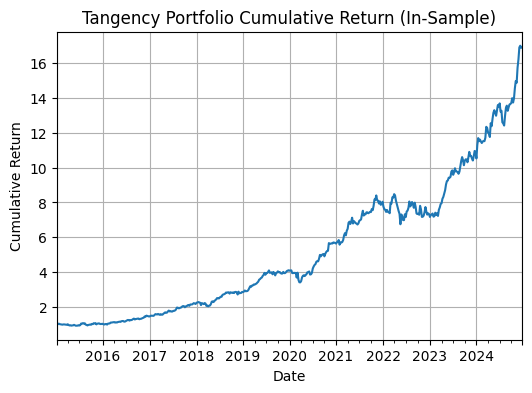

In [5]:
from scipy.stats import skew

# Tangency portfolio returns
r_tan = rets_in @ w_tan_df

# Annualized stats
mean_tan = r_tan.mean() * 52
vol_tan = r_tan.std() * np.sqrt(52)
sharpe_tan = mean_tan / vol_tan
skew_tan = skew(r_tan)

print(f"Mean: {mean_tan:.4f}")
print(f"Volatility: {vol_tan:.4f}")
print(f"Sharpe Ratio: {sharpe_tan:.4f}")
print(f"Skewness: {skew_tan:.4f}")

# Cumulative return plot
(1 + r_tan).cumprod().plot(figsize=(6,4), grid=True, title="Tangency Portfolio Cumulative Return (In-Sample)")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.show()




## 3. Hedging the Tangency Portfolio

Continue with the in-sample (through 2024) tangency returns calculated in the previous problem.

#### 3.1.

Compute portfolio returns and regress on `SPY` to get $\hat{\beta}$. 

Include an intercept in the regression.

Report $\hat{\beta}$.

#### 3.2. 

Calculate the returns to the hedged position.

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)
   

In [6]:
from scipy.stats import skew

# Align both series on common dates
r_tan = rets_in @ w_tan_df
r_spy = spy.loc[:'2024-12-31']['SPY']
r_tan, r_spy = r_tan.align(r_spy, join='inner')

# OLS with intercept
X = np.vstack([np.ones(len(r_spy)), r_spy]).T
beta_hat = np.linalg.lstsq(X, r_tan, rcond=None)[0][1]

print(f"Estimated Beta (β̂): {beta_hat:.4f}")

# Hedged returns
r_hedged = r_tan - beta_hat * r_spy

# Annualized stats
mean_h = r_hedged.mean() * 52
vol_h = r_hedged.std() * (52 ** 0.5)
sharpe_h = mean_h / vol_h
skew_h = skew(r_hedged)

print("\n\nHedged Portfolio Performance (In-Sample):\n")
print(f"Mean: {mean_h:.4f}")
print(f"Volatility: {vol_h:.4f}")
print(f"Sharpe Ratio: {sharpe_h:.4f}")
print(f"Skewness: {skew_h:.4f}")


Estimated Beta (β̂): 0.6048


Hedged Portfolio Performance (In-Sample):

Mean: 0.2160
Volatility: 0.1499
Sharpe Ratio: 1.4404
Skewness: 0.1692


## 4. Out-of-Sample

#### 4.1. Tangency Portfolio Performance: Out-of-Sample (OOS)

Use the weights of the tangency portfolio calculated above.

Compute the out-of-sample returns (`2025`), and just for this OOS portion, report the (annualized)
* mean
* volatility
* Sharpe ratio
* skewness (not annualized)
   
   
#### 4.2. Cumulative performance

* Include the OOS performance in the cumulative return plot (in addition to the in-sample performance).

Show the plot.

Out-of-Sample (2025) Tangency Portfolio Performance:

Mean: 0.4346
Volatility: 0.2169
Sharpe Ratio: 2.0034
Skewness: -0.2645


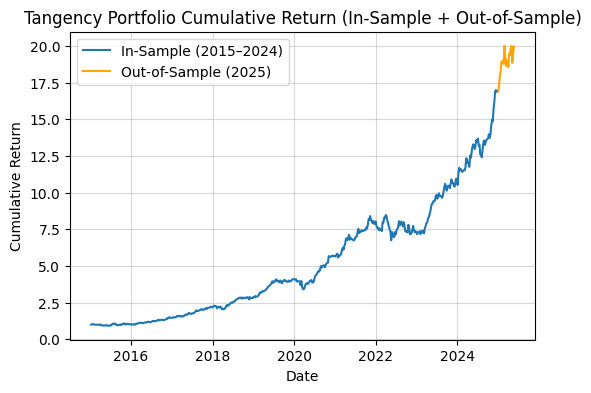

In [7]:

# 4.1: Out-of-sample period (2025)
rets_oos = rets_intact.loc['2025-01-01':'2025-12-31']
rets_oos = rets_oos[w_tan_df.index.intersection(rets_oos.columns)]
r_tan_oos = rets_oos @ w_tan_df
r_tan_oos = r_tan_oos.dropna()

# Annualized OOS performance
mean_oos = r_tan_oos.mean() * 52
vol_oos = r_tan_oos.std() * np.sqrt(52)
sharpe_oos = mean_oos / vol_oos
skew_oos = skew(r_tan_oos)

print("Out-of-Sample (2025) Tangency Portfolio Performance:\n")
print(f"Mean: {mean_oos:.4f}")
print(f"Volatility: {vol_oos:.4f}")
print(f"Sharpe Ratio: {sharpe_oos:.4f}")
print(f"Skewness: {skew_oos:.4f}")

# 4.2: Combined cumulative return plot (In-Sample + OOS)
r_tan_full = pd.concat([r_tan, r_tan_oos])
cum_ret_full = (1 + r_tan_full).cumprod()

plt.figure(figsize=(6,4))
plt.plot(cum_ret_full.loc[:'2024-12-31'], label='In-Sample (2015–2024)')
plt.plot(cum_ret_full.loc['2025-01-01':], label='Out-of-Sample (2025)', color='orange')
plt.title("Tangency Portfolio Cumulative Return (In-Sample + Out-of-Sample)")
plt.ylabel("Cumulative Return")
plt.xlabel("Date")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

## 5. Optimizing Hedged Returns

#### 5.1. Construct Market-Hedged Returns

Active managers might optimize their portfolios using market-hedged returns to focus on alpha generation (maximize portion of returns orthogonal to the market). Market-hedged returns are the residuals from regressing each stock’s excess return on the market’s excess return (e.g., `SPY`), effectively removing market beta to isolate stock-specific (idiosyncratic) performance.

* Regress each stock's excess return on the SPY index (quoted in excess return) over the sample period. 
* Include an intercept.
* Report your betas.

In [8]:
# 5.1: Regress each stock's excess return on SPY to get betas and alphas
r_spy = spy.loc[:'2024-12-31', 'SPY']
r_spy = r_spy - r_spy.mean()  # center if needed
r_spy, rets_in = r_spy.align(rets_in, join='inner')

betas = {}
alphas = {}

for col in rets_in.columns:
    X = np.vstack([np.ones(len(r_spy)), r_spy]).T
    y = rets_in[col].values
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    alphas[col], betas[col] = coeffs[0], coeffs[1]

betas_df = pd.Series(betas, name='Beta')
alphas_df = pd.Series(alphas, name='Alpha')

print("Market Betas:\n")
display(betas_df.round(4))


Market Betas:



ADSK     1.3461
AOS      1.0506
BKNG     1.2700
CBRE     1.3251
CCI      0.7375
CF       0.9880
CHRW     0.5943
DE       1.1275
DGX      0.7508
DTE      0.6998
ES       0.6769
GD       0.9910
GOOGL    1.0717
INTU     1.2911
MGM      1.8320
MRK      0.4671
MTD      1.0837
PG       0.5545
PNR      1.2990
SBAC     0.8285
STE      0.9219
TTWO     0.7262
VTRS     0.9692
WM       0.6370
WMT      0.5016
Name: Beta, dtype: float64

#### 5.2. The residuals

Save the residuals from each regression as the market-hedged returns. 

Report the `.tail()` (last 5 observations) of the residual dataframe.

In [9]:
# 5.2: Compute residuals (market-hedged returns)
residuals = pd.DataFrame(index=rets_in.index, columns=rets_in.columns)

for col in rets_in.columns:
    X = np.vstack([np.ones(len(r_spy)), r_spy]).T
    y = rets_in[col].values
    coeffs = np.linalg.lstsq(X, y, rcond=None)[0]
    fitted = X @ coeffs
    residuals[col] = y - fitted  # store residuals

print("Market-Hedged Returns (Residuals) - Last 5 Observations:\n")
display(residuals.tail())


Market-Hedged Returns (Residuals) - Last 5 Observations:



,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE,...,MRK,MTD,PG,PNR,SBAC,STE,TTWO,VTRS,WM,WMT
date,,,,,,,,,,,,,,,,,,,,,
2024-11-29,-0.108049,0.001919,-0.010707,0.017987,-0.000695,-0.013378,-0.026047,0.028463,-0.015035,0.001000,...,0.018365,0.013934,0.009785,0.004557,0.015754,0.010505,-0.009923,-0.028645,0.007773,0.015156
2024-12-06,0.041694,-0.034368,0.009021,-0.026658,-0.047508,-0.022482,-0.000899,-0.058154,-0.039673,-0.039778,...,0.009273,-0.004627,-0.035752,-0.018765,-0.032963,-0.023136,-0.001839,-0.032969,-0.030388,0.028523
2024-12-13,-0.005549,0.004611,-0.006689,0.003625,-0.026479,0.017587,0.059799,-0.002645,-0.010962,0.001563,...,-0.008723,0.021033,-0.013159,-0.000446,-0.022560,-0.002893,-0.020556,0.002421,-0.038362,-0.011696
2024-12-20,0.005347,-0.032718,-0.011464,-0.035024,-0.052567,-0.032651,-0.052474,0.001304,0.001023,0.012541,...,-0.023388,-0.016891,-0.007943,-0.024171,-0.034588,-0.015143,-0.008179,0.012803,-0.024570,-0.013826
2024-12-27,-0.011285,-0.011038,-0.011001,0.002711,-0.005577,-0.009409,-0.008351,-0.014287,-0.008446,0.004969,...,0.012862,-0.004779,0.004561,-0.015779,-0.007017,-0.004276,0.017208,-0.005774,-0.014627,-0.011255


#### 5.3 Diversification Benefits of Market-Hedged Returns

Display the covariance matrix of the market-hedged returns for the first ten stocks.


In [10]:
# 5.3: Covariance matrix of market-hedged returns (first 10 stocks)
cov_resid = residuals.iloc[:, :10].cov() * 52  # annualized
print("Covariance Matrix of Market-Hedged Returns (First 10 Stocks):\n")
display(cov_resid.round(6))


Covariance Matrix of Market-Hedged Returns (First 10 Stocks):



,ADSK,AOS,BKNG,CBRE,CCI,CF,CHRW,DE,DGX,DTE
ADSK,0.074221,-0.000768,0.008865,0.000639,0.000043,-0.009479,0.001483,-0.007296,-0.003985,-0.011858
AOS,-0.000768,0.044434,0.002804,0.011971,0.005090,0.003640,0.008747,0.011189,0.003409,-0.001164
BKNG,0.008865,0.002804,0.057384,0.009359,-0.009382,0.003570,-0.002364,0.003391,-0.008099,-0.004369
CBRE,0.000639,0.011971,0.009359,0.053054,0.003925,0.015419,-0.003130,0.003512,0.002879,0.007751
CCI,0.000043,0.005090,-0.009382,0.003925,0.045666,-0.008014,0.001118,-0.005453,0.007902,0.014564
CF,-0.009479,0.003640,0.003570,0.015419,-0.008014,0.130449,0.007837,0.025454,0.002955,0.004354
CHRW,0.001483,0.008747,-0.002364,-0.003130,0.001118,0.007837,0.053639,0.006422,-0.000828,0.000495
DE,-0.007296,0.011189,0.003391,0.003512,-0.005453,0.025454,0.006422,0.058897,-0.001478,0.001686
DGX,-0.003985,0.003409,-0.008099,0.002879,0.007902,0.002955,-0.000828,-0.001478,0.040883,0.010468
DTE,-0.011858,-0.001164,-0.004369,0.007751,0.014564,0.004354,0.000495,0.001686,0.010468,0.034688


#### 5.4. Portfolio Optimization with Market-Hedged Returns

Construct the tangency portfolio using the alphas (intercept from previous regression) as expected returns and the covariance matrix of the market-hedged returns. Display the portfolio weights.

In [11]:
# 5.4: Tangency portfolio using alphas (expected returns) and covariance of residuals
alpha_vec = alphas_df.values           # expected returns = alphas
Sigma_hedged = residuals.cov().values * 52  # annualized covariance

# Tangency weights (normalize to sum to 1)
w_tan_hedged = np.linalg.inv(Sigma_hedged) @ alpha_vec
w_tan_hedged = w_tan_hedged / w_tan_hedged.sum()

# Create Series for readability
w_tan_hedged_df = pd.Series(w_tan_hedged, index=residuals.columns, name="Hedged Tangency Weights")

print("Tangency Portfolio Weights (Market-Hedged Returns):\n")
display(w_tan_hedged_df.sort_values(ascending=False).round(4))


Tangency Portfolio Weights (Market-Hedged Returns):



GOOGL    0.1272
INTU     0.0986
WMT      0.0931
DTE      0.0786
WM       0.0676
PG       0.0664
DE       0.0616
CBRE     0.0563
MRK      0.0528
PNR      0.0502
BKNG     0.0487
TTWO     0.0470
GD       0.0447
DGX      0.0442
ADSK     0.0380
MTD      0.0284
STE      0.0168
CHRW     0.0140
CF       0.0122
MGM      0.0105
AOS      0.0086
SBAC     0.0058
CCI     -0.0095
VTRS    -0.0132
ES      -0.0485
Name: Hedged Tangency Weights, dtype: float64

#### 5.5. Performance of the Tangency of the Hedged

Calculate the returns to the portfolio with weights from the previous question (just in-sample).

   Report the (annualized)
   * mean
   * volatility
   * Sharpe ratio
   * skewness (not annualized)

In [12]:
# 5.5: Portfolio returns using hedged tangency weights (in-sample)
r_tan_hedged = residuals @ w_tan_hedged_df

# Annualized performance
mean_hdg = r_tan_hedged.mean() * 52
vol_hdg = r_tan_hedged.std() * (52 ** 0.5)
sharpe_hdg = mean_hdg / vol_hdg
skew_hdg = skew(r_tan_hedged)

print("Tangency Portfolio Performance (Market-Hedged, In-Sample):\n")
print(f"Mean: {mean_hdg:.4f}")
print(f"Volatility: {vol_hdg:.4f}")
print(f"Sharpe Ratio: {sharpe_hdg:.4f}")
print(f"Skewness: {skew_hdg:.4f}")

Tangency Portfolio Performance (Market-Hedged, In-Sample):

Mean: 0.0000
Volatility: 0.0497
Sharpe Ratio: 0.0000
Skewness: 0.0111


***

# 2. Managing Risk

In [13]:
DATAFILE = '../data/midterm_1_fund_returns.xlsx'
df = pd.read_excel(DATAFILE, sheet_name='fund returns').set_index('date')


#### 1. Calculating Volatility
Given the return data provided, calculate the annual volatility grouped by year. Annualize this volatility. That is, your answer should be a DataFrame with 10 rows (one for each year from 2015 to 2024) and a single column representing the annualized volatility for that year.

What do you notice about the volatility across different years?

In [14]:
print("Volatility Grouped by Year: \n")

annual_vol = df['fund'].groupby(df.index.year).std() * (52 ** 0.5)


print(annual_vol.round(4))

Volatility Grouped by Year: 

date
2015    0.0464
2016    0.1758
2017    0.0490
2018    0.1847
2019    0.0567
2020    0.1966
2021    0.0391
2022    0.2068
2023    0.0514
2024    0.2164
Name: fund, dtype: float64


Volatility varies significantly across years, with spikes in 2018, 2020, 2022, and 2024 indicating higher market turbulence.

#### 2. Volatility Estimates

Using the return data, compute the annualized volatility estimate as of the last data point using the following methods:
- EWMA volatility with a half-life of 26 weeks.
- Rolling window volatility with a window size of 52 weeks.

**Note:** do not specify a "min_periods" argument anywhere.

In [15]:
# EWMA volatility (half-life = 26 weeks)
ewma_vol = df['fund'].ewm(halflife=26).std().iloc[-1] * np.sqrt(52)

# Rolling window volatility (window = 52 weeks)
rolling_vol = df['fund'].rolling(window=52).std().iloc[-1] * np.sqrt(52)

print(f"EWMA (26w) = {ewma_vol:.4f}")
print(f"Rolling (52w) = {rolling_vol:.4f}")


EWMA (26w) = 0.1797
Rolling (52w) = 0.2164


#### 3. Dynamic VaR estimates

Using the return data, compute the 1-week 1% VaR as of the last data point in the series.

You should use two different volatility models to compute the VaR:
- EWMA volatility with a half-life of 26 weeks.
- Rolling-window volatility with a window of 52 weeks.
- Empirical (expanding) VaR.

In [16]:
from scipy.stats import norm

# 1% quantile (z-score)
z_01 = norm.ppf(0.01)

# EWMA volatility (26w half-life)
ewma_vol = df['fund'].ewm(halflife=26).std() * np.sqrt(52)
VaR_ewma = z_01 * ewma_vol.iloc[-1]

# Rolling 52w volatility
roll_vol = df['fund'].rolling(window=52).std() * np.sqrt(52)
VaR_roll = z_01 * roll_vol.iloc[-1]

# Empirical (expanding) VaR
VaR_emp = df['fund'].expanding().quantile(0.01).iloc[-1]

print(f"EWMA VaR (1%, 1-week): {VaR_ewma:.4f}")
print(f"Rolling 52w VaR (1%, 1-week): {VaR_roll:.4f}")
print(f"Empirical VaR (1%, 1-week): {VaR_emp:.4f}")

EWMA VaR (1%, 1-week): -0.4181
Rolling 52w VaR (1%, 1-week): -0.5034
Empirical VaR (1%, 1-week): -0.0528


#### 4. Dynamic CVaR estimates

Repeat Question 3, but instead compute the 1-week 1% Conditional VaR (CVaR) as of the last data point in the series using the same three methods.

In [17]:
# CVaR for normal distribution (1%) constant
cvar_const = norm.pdf(norm.ppf(0.01)) / 0.01  # ≈ 2.665

# EWMA volatility (half-life = 26)
ewma_vol = df['fund'].ewm(halflife=26).std() * np.sqrt(52)
CVaR_ewma = -cvar_const * ewma_vol.iloc[-1]

# Rolling 52w volatility
roll_vol = df['fund'].rolling(window=52).std() * np.sqrt(52)
CVaR_roll = -cvar_const * roll_vol.iloc[-1]

# Empirical CVaR (mean of worst 1%)
CVaR_emp = df['fund'][df['fund'] <= df['fund'].quantile(0.01)].mean()

print(f"EWMA CVaR (1%, 1-week): {CVaR_ewma:.4f}")
print(f"Rolling 52w CVaR (1%, 1-week): {CVaR_roll:.4f}")
print(f"Empirical CVaR (1%, 1-week): {CVaR_emp:.4f}")


EWMA CVaR (1%, 1-week): -0.4790
Rolling 52w CVaR (1%, 1-week): -0.5768
Empirical CVaR (1%, 1-week): -0.0658


#### 5. Year Choice

Suppose instead we were interested in our VaR estimates as of the end of 2023 (ie. use all data that is before 2024-01-01). Report your VaR (1-week, 1%) estimates using the same three methods as in Question 3, but now the last data point in 2023.

Hint: You can use `df.loc[:'2023']` to filter the DataFrame to only include data up to the end of 2023.

In [18]:
# Filter data up to end of 2023
df_2023 = df.loc[:'2023']

# 1% quantile (z-score)
z_01 = norm.ppf(0.01)

# EWMA volatility (26w half-life)
ewma_vol_2023 = df_2023['fund'].ewm(halflife=26).std().iloc[-1] * np.sqrt(52)
VaR_ewma_2023 = z_01 * ewma_vol_2023

# Rolling 52w volatility
roll_vol_2023 = df_2023['fund'].rolling(window=52).std().iloc[-1] * np.sqrt(52)
VaR_roll_2023 = z_01 * roll_vol_2023

# Empirical VaR
VaR_emp_2023 = df_2023['fund'].quantile(0.01)

print(f"EWMA VaR (1%, 1-week, end 2023): {VaR_ewma_2023:.4f}")
print(f"Rolling 52w VaR (1%, 1-week, end 2023): {VaR_roll_2023:.4f}")
print(f"Empirical VaR (1%, 1-week, end 2023): {VaR_emp_2023:.4f}")


EWMA VaR (1%, 1-week, end 2023): -0.2337
Rolling 52w VaR (1%, 1-week, end 2023): -0.1197
Empirical VaR (1%, 1-week, end 2023): -0.0496


### 6. Compare

What do you notice about the VaR estimates compared to those from question `2.2`?

When comparing the VaR as of end-2023 to the VaR as of the latest data point (2025):

- The 2023 VaR values are smaller in magnitude (e.g., −0.23 EWMA vs −0.42 later), which indicates lower estimated risk at that time.

- By contrast, the more recent VaR estimates (2025) are larger in absolute value, meaning the model now projects higher potential losses at the 1% tail.

Market conditions appear to have become more volatile after 2023; hence the more negative (larger-magnitude) VaR estimates in 2025, reflecting a higher level of estimated tail risk.